<h1>Building an Image Classifier using the Sequential API</h1>

In [39]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [40]:
keras.__version__

'2.2.4-tf'

<h3> Load fashion data </h3>

In [41]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [42]:
X_train_full.shape

(60000, 28, 28)

In [43]:
X_train_full.dtype

dtype('uint8')

<h3>Scale down pixel intensities for Gradient Decent Use</h3>

In [44]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [45]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [46]:
class_names[y_train[0]]

'Coat'

<h3> Create Model using the Sequential API<h3>

<p>This is a classification MLP with two hidden layers</p>

In [47]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.layers

In [50]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [51]:
model.get_layer('dense') is hidden1

ValueError: No such layer: dense

In [52]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01356141, -0.02285412, -0.02138506, ...,  0.01948997,
         0.02672933, -0.07435989],
       [ 0.05999687, -0.03627987, -0.00399465, ...,  0.06779774,
         0.05498813, -0.05334818],
       [-0.03830175, -0.01264675,  0.02603899, ..., -0.040036  ,
         0.00044029,  0.01937243],
       ...,
       [-0.02177479, -0.0655054 , -0.05530908, ..., -0.0718627 ,
         0.00816237, -0.00863206],
       [ 0.04691485, -0.00175516, -0.00367241, ...,  0.03136493,
        -0.02322577, -0.05601733],
       [ 0.0489    , -0.04101618,  0.05252209, ..., -0.00683739,
         0.0574947 , -0.03303322]], dtype=float32)

In [53]:
weights.shape

(784, 300)

In [54]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
biases.shape

(300,)

<h3>Compile the model to prepare for training</h3>
<p>Specifiy the means for how the model will evaluate and learn from the data<p>

In [56]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])


<h3>Train the previously compiled model</h3>
<p>Train the model with the training set and evaluate the performance with the validation set <p>

In [57]:
history = model.fit(X_train, y_train, epochs=2,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 117us/sample - loss: 0.7158 - accuracy: 0.7609 - val_loss: 0.5029 - val_accuracy: 0.8282
Epoch 2/2
55000/55000 [==============================] - 6s 116us/sample - loss: 0.4894 - accuracy: 0.8299 - val_loss: 0.4602 - val_accuracy: 0.8380


In [58]:
history.params

{'batch_size': 32,
 'epochs': 2,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

<h3>Visualize the model performance throughout the epochs</h3>

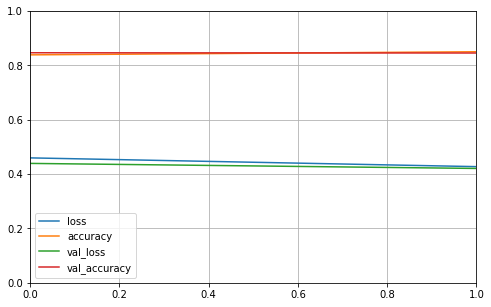

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertial range to [0-1]
plt.show()

In [59]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 67us/sample - loss: 67.5232 - accuracy: 0.8117


[67.52317660751343, 0.8117]

In [60]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [62]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [63]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [64]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

<h3> Regression MLP Using the Sequential API <h3>

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [67]:
X_valid.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 103us/sample - loss: 1.0562 - accuracy: 0.0034 - val_loss: 4.8745 - val_accuracy: 0.0026
Epoch 2/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.8761 - accuracy: 0.0034 - val_loss: 5.3553 - val_accuracy: 0.0026
Epoch 3/20
11610/11610 [==============================] - 1s 76us/sample - loss: 0.6804 - accuracy: 0.0034 - val_loss: 0.4228 - val_accuracy: 0.0023
Epoch 4/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.4172 - accuracy: 0.0034 - val_loss: 0.3957 - val_accuracy: 0.0026
Epoch 5/20
11610/11610 [==============================] - 1s 80us/sample - loss: 0.3985 - accuracy: 0.0034 - val_loss: 0.3834 - val_accuracy: 0.0026
Epoch 6/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3863 - accuracy: 0.0034 - val_loss: 0.3678 - val_accuracy: 0.0026
Epoch 7/20
11610/11610 [==============================] 

In [69]:
y_pred

array([[2.4006705],
       [2.8561912],
       [1.9366429]], dtype=float32)

In [70]:
y_test[:3]

array([3.067, 2.341, 1.691])

In [71]:
mse_test

[0.4160736878250921, 0.002131783]

<h2>Complex models using the functional api</h2>
<p>This will be used to tackle california's housing problem</p>
   

In [72]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [73]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=2,
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 98us/sample - loss: 0.8385 - accuracy: 0.0028 - val_loss: 2.6384 - val_accuracy: 0.0031
Epoch 2/2
11610/11610 [==============================] - 1s 68us/sample - loss: 0.5087 - accuracy: 0.0028 - val_loss: 0.6121 - val_accuracy: 0.0031


In [74]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

5160/5160 [==============================] - 0s 38us/sample - loss: 0.4587 - accuracy: 0.0031


In [75]:
mse_test

[0.4586589502733807, 0.0031007752]

In [76]:
y_test[:3]

array([1.186, 1.595, 1.221])

In [77]:
y_pred

array([[1.482974 ],
       [1.5367608],
       [1.9165425]], dtype=float32)

<h2> Sending subset of data through wide path <h2>

In [78]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 108us/sample - loss: 2.4077 - val_loss: 3.6185
Epoch 2/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.8112 - val_loss: 0.6675
Epoch 3/20
11610/11610 [==============================] - 1s 116us/sample - loss: 0.6127 - val_loss: 0.5682
Epoch 4/20
11610/11610 [==============================] - 1s 94us/sample - loss: 0.5508 - val_loss: 0.6182
Epoch 5/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.5209 - val_loss: 0.5165
Epoch 6/20
11610/11610 [==============================] - 1s 110us/sample - loss: 0.5030 - val_loss: 0.5111- loss: 0.49
Epoch 7/20
11610/11610 [==============================] - 1s 129us/sample - loss: 0.4884 - val_loss: 0.4771
Epoch 8/20
11610/11610 [==============================] - 1s 72us/sample - loss: 0.4799 - val_loss: 0.4720
Epoch 9/20
11610/11610 [==============================] - 1s 71us/sample - loss

<h3>Aux output for regularization</h3>

In [ ]:
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [ ]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

In [ ]:
total_loss

In [ ]:
main_loss

In [ ]:
aux_loss

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [ ]:
y_pred_main

In [ ]:
y_pred_aux

<h2>Saving and Restoring a Model</h2>

In [ ]:
model.save("my_keras_model.h5")
loadedModel = keras.models.load_model("my_keras_model.h5")

<p>Callbacks can be used to create checkpoints while the model is being trained. This is helpful when training a model that takes several hours to train</p>

In [ ]:
# Example 
# checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
# history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
# when using the validation set, you can use 
# keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)

In [ ]:
# EarlyStopping callback can be used to interrupt training when it measures no progress on
# the validation set for a nummber of epochs (defined by patience argument)
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# history = model.fit(X_train, y_train, epochs=100,
#                  validation_data=(X_valid, y_valid),
#                   callbacks=[checkpoint_cb, early_stopping_cb])

<h1>TensorBoard for Visualization</h1>

In [80]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [81]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), for inputs ['wide_input', 'deep_input'] but instead got the following list of 1 arrays: [array([[-0.90156309,  1.13544711, -0.7861074 , ..., -0.43571418,
         1.02146526, -1.33154773],
       [-1.06415299, -0.36930971, -0.0689919 , ...,  0.47182044,
         0.51391504, -0.23739851],...

In [82]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [83]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [85]:
keras_reg.fit(X_train, y_train, epochs=2,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/2
11610/11610 [==============================] - 1s 102us/sample - loss: 0.9715 - val_loss: 0.7313
Epoch 2/2
11610/11610 [==============================] - 1s 82us/sample - loss: 0.6080 - val_loss: 0.6479


In [86]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

TypeError: Singleton array array(100) cannot be considered a valid collection.

In [89]:
import sklearn as sklearn

In [90]:
sklearn.__version__

'0.22'